In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/insurance.csv')

In [ ]:
data

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [ ]:
new_data = data[["age","sex","bmi","smoker"]]
new_data

,age,sex,bmi,smoker
0,19,female,27.9,yes
1,18,male,33.8,no
2,28,male,33.0,no
3,33,male,22.7,no
4,32,male,28.9,no
...,...,...,...,...
1333,50,male,31.0,no
1334,18,female,31.9,no
1335,18,female,36.9,no
1336,21,female,25.8,no


In [ ]:
new_data = new_data.replace("female","1") # female - 1
new_data = new_data.replace("male","0") # male - 0

new_data = new_data.replace("yes","1") # yes - 1
new_data = new_data.replace("no","0") # no - 0
new_data

,age,sex,bmi,smoker
0,19,1,27.9,1
1,18,0,33.8,0
2,28,0,33.0,0
3,33,0,22.7,0
4,32,0,28.9,0
...,...,...,...,...
1333,50,0,31.0,0
1334,18,1,31.9,0
1335,18,1,36.9,0
1336,21,1,25.8,0


In [ ]:
x = new_data[["age","sex","bmi"]]
y = new_data[["smoker"]]

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.2, random_state = 1)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model = GaussianNB()
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
from sklearn.metrics import accuracy_score

prediction = model.predict(x_test)

print(accuracy_score(prediction,y_test))

0.7955182072829131


In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

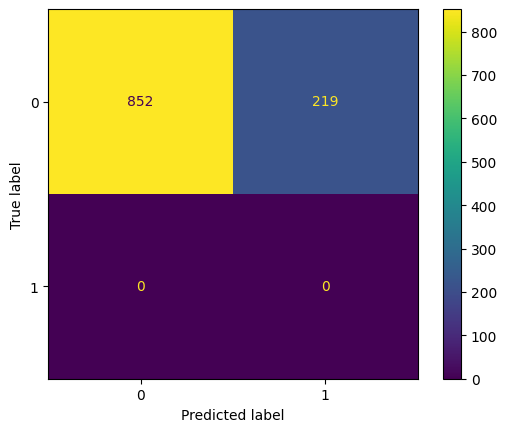

In [ ]:
cm = confusion_matrix(prediction,y_test)
display = ConfusionMatrixDisplay(cm)
display.plot()